In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel("C:/Users/Josiah/Downloads/books.v3.2.dropped_columns (1).xlsx")


In [64]:
df.head(10)

,bookID,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12224,Sam Bass Warner,3.58,9780674842113,en-US,236,61,6,38097,Harvard University Press
1,16914,David E. Smith (Turgon of TheOneRing.net,3.58,9781593600112,eng,400,26,4,38083,Cold Spring Press
2,26012,Bret Easton Ellis,3.46,9782264031914,fre,537,56,5,36937,2018-10-01 00:00:00
3,28225,Nicholson Baker,3.84,9782264017697,fre,191,6,1,36117,2018-10-01 00:00:00
4,22128,James Wesley,3.63,9781563841552,eng,342,38,4,36175,Huntington House Publishers
5,31095,Robert M. Pirsig,3.58,9781403356208,en-GB,600,54,5,37635,1st Book Library
6,5478,George Orwell,4.18,9781421808321,eng,387,215,17,38534,1st World Library
7,31373,Elizabeth George,4.10,9780553575101,eng,718,10608,295,36831,Bantam Books
8,16285,Terry Deary,4.40,9780713659894,eng,62,5,0,37195,A & C Black
9,18843,Virginia Woolf,4.07,9780156028066,eng,216,244,13,37711,A Harvest Book


In [65]:
df.tail(10)

,bookID,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11117,34506,Terry Pratchett,3.97,9780061020704,eng,277,91479,2031,36558,HarperTorch
11118,34507,Terry Pratchett,4.03,9780060855901,eng,228,110062,2261,38608,Harper Perennial
11119,34510,Terry Pratchett,3.94,9780552152945,eng,396,52713,817,38443,Corgi
11120,34517,Terry Pratchett,4.28,9780552152952,eng,352,63287,1445,38443,Corgi
11121,34529,Terry Pratchett,4.17,9780552153157,eng,400,53721,814,38565,Corgi
11122,34532,Terry Pratchett,4.23,9780552154284,eng,432,60162,1373,38992,Corgi
11123,34541,Terry Pratchett,4.14,9780061051586,eng,296,41899,746,36411,Harper Voyager
11124,36402,Sarah Fielding,2.63,9781551114125,eng,242,132,18,38621,Broadview Press Inc
11125,38522,Sherrilyn Kenyon,4.06,9780312349295,eng,373,7959,200,38993,St. Martin's Press
11126,40132,Leonardo da Vinci,4.17,9780300090956,eng,336,120,4,37114,Yale University Press


In [66]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,36768.842995
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,2998.495083
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,4750.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,35992.500000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,37681.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,38625.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,43921.000000


In [67]:
df.describe(include=["O"])

,authors,language_code,publisher
count,11127,11127,11127
unique,4219,27,1801
top,William Shakespeare,eng,Penguin Books
freq,88,8911,370


In [68]:
df.isna().sum()

bookID                0
authors               0
average_rating        0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [69]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [70]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['language_code'])
df['language_code_encoded'] = target_encoder.fit_transform(df['language_code'], df['average_rating'])


In [71]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['publisher'])
df['publisher_encoded'] = target_encoder.fit_transform(df['publisher'], df['average_rating'])


In [72]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['authors'])
df['authors_encoded'] = target_encoder.fit_transform(df['authors'], df['average_rating'])


In [73]:
print(df.columns)


Index(['bookID', 'authors', 'average_rating', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'language_code_encoded',
       'publisher_encoded', 'authors_encoded'],
      dtype='object')


In [74]:
df.corr(numeric_only=True)

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,language_code_encoded,publisher_encoded,authors_encoded
bookID,1.000000,-0.036949,-0.002185,-0.026223,-0.076815,-0.081284,0.028401,-0.016112,-0.042639,-0.060426
average_rating,-0.036949,1.000000,-0.002013,0.150809,0.038205,0.033734,-0.030681,0.107293,0.459667,0.695883
isbn13,-0.002185,-0.002013,1.000000,-0.009822,0.005491,0.008148,-0.000643,0.006715,-0.002361,0.005067
num_pages,-0.026223,0.150809,-0.009822,1.000000,0.034353,0.036998,-0.019184,-0.027015,0.039800,0.048601
ratings_count,-0.076815,0.038205,0.005491,0.034353,1.000000,0.865979,0.044088,-0.000118,-0.004800,0.059606
text_reviews_count,-0.081284,0.033734,0.008148,0.036998,0.865979,1.000000,0.066223,-0.002233,-0.027454,0.028978
publication_date,0.028401,-0.030681,-0.000643,-0.019184,0.044088,0.066223,1.000000,-0.013229,0.017931,0.008655
language_code_encoded,-0.016112,0.107293,0.006715,-0.027015,-0.000118,-0.002233,-0.013229,1.000000,0.108301,0.201621
publisher_encoded,-0.042639,0.459667,-0.002361,0.039800,-0.004800,-0.027454,0.017931,0.108301,1.000000,0.435102
authors_encoded,-0.060426,0.695883,0.005067,0.048601,0.059606,0.028978,0.008655,0.201621,0.435102,1.000000


In [96]:
df_processed = df.drop(columns=["authors", "language_code","publisher","bookID","isbn13","publication_date" ])

In [97]:
len(df)

11127

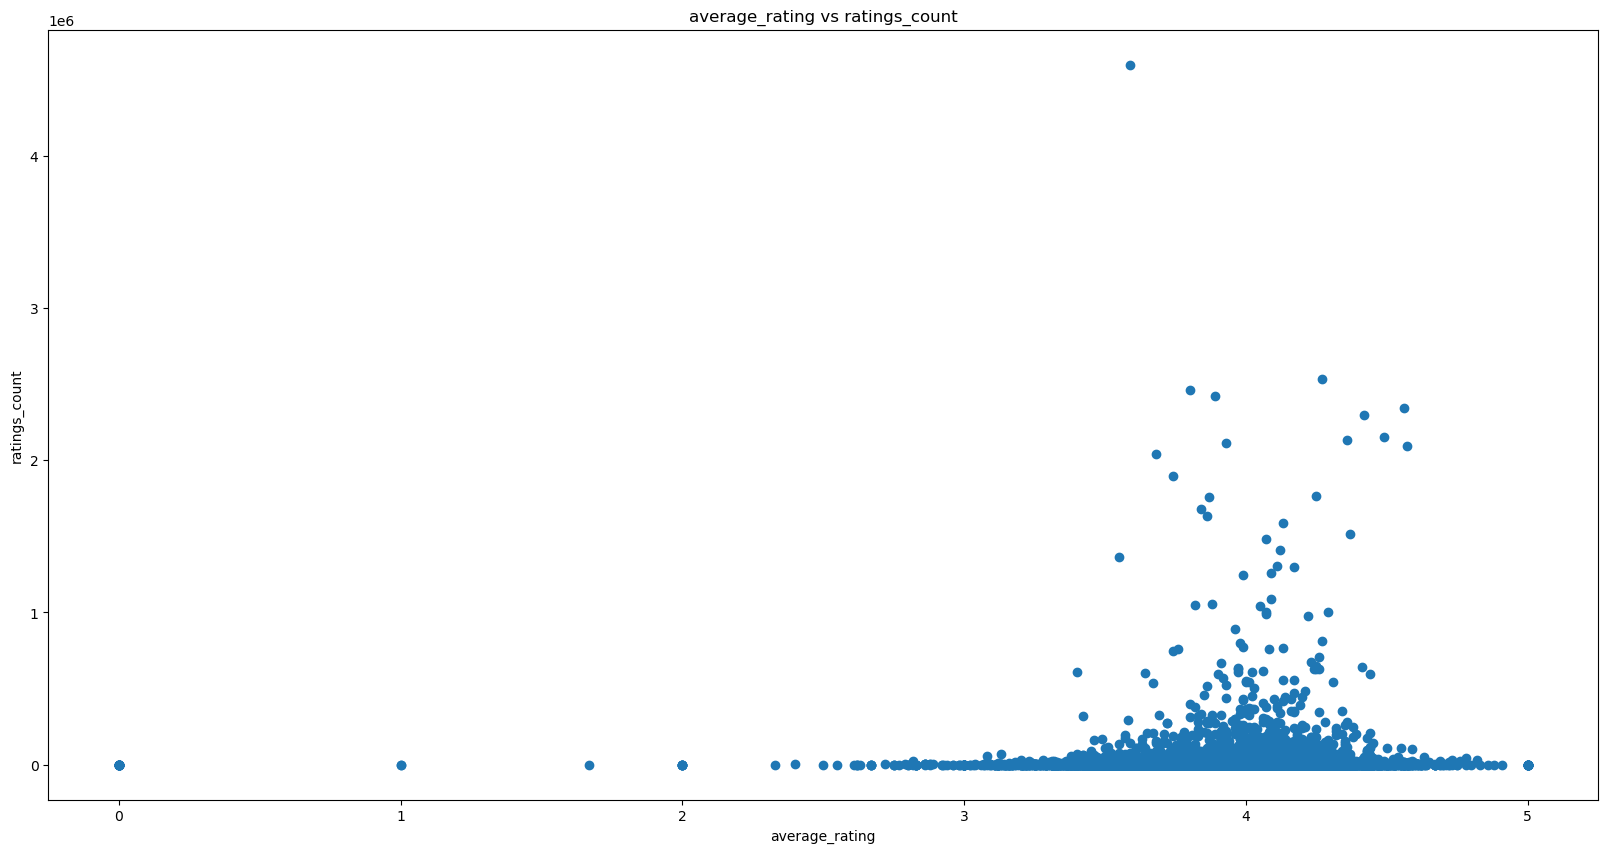

In [98]:
plt.figure(figsize=(20,10))
plt.scatter(df.average_rating,df.ratings_count)
plt.title("average_rating vs ratings_count")
plt.xlabel("average_rating")
plt.ylabel("ratings_count")
plt.show()

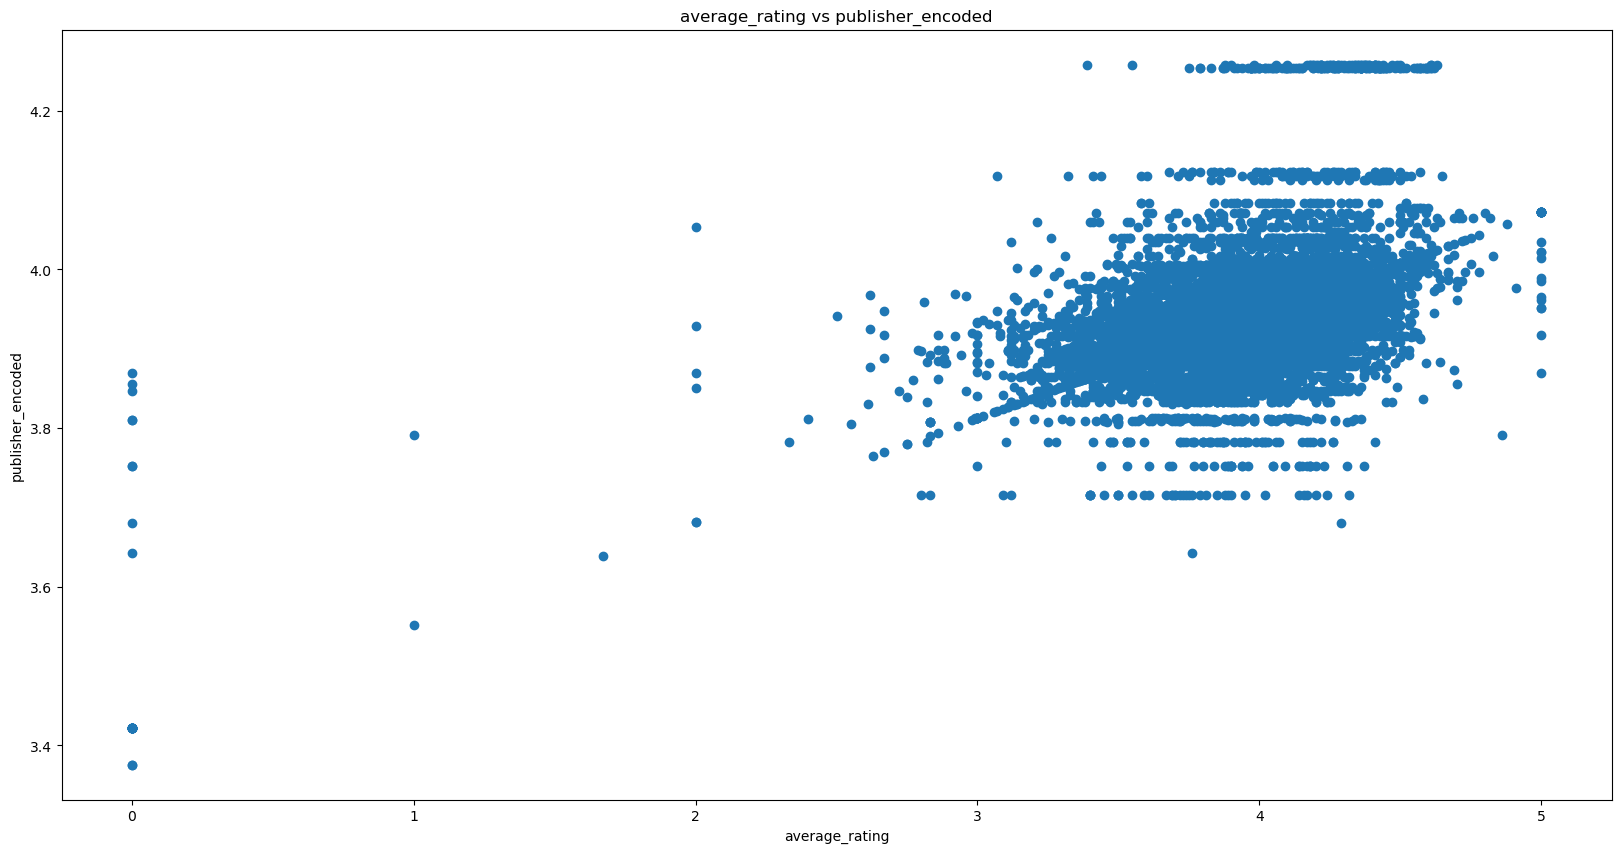

In [99]:
plt.figure(figsize=(20,10))
plt.scatter(df.average_rating,df.publisher_encoded)
plt.title("average_rating vs publisher_encoded")
plt.xlabel("average_rating")
plt.ylabel("publisher_encoded")
plt.show()

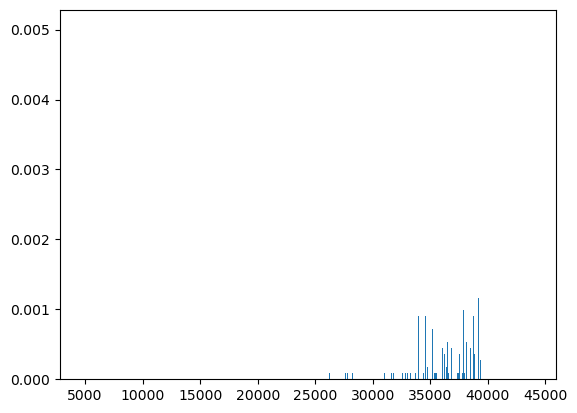

In [100]:
plt.bar(x=df.publication_date.value_counts().index,height=df.publication_date.value_counts(10))
plt.show()

In [101]:
sns.displot(df.num_pages)

AttributeError: 'DataFrame' object has no attribute 'num_pages'

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.average_rating,y=df.ratings_count)
plt.show()

In [ ]:
sns.histplot(x="average_rating",hue="language_code_encoded",multiple="stack",data=df)
plt.show(50)

In [102]:
print(df_processed)

       average_rating    num_pages  ratings_count  text_reviews_count  \
0                3.58          236             61                   6   
1                3.58          400             26                   4   
2                3.46          537             56                   5   
3                3.84          191              6                   1   
4                3.63          342             38                   4   
...               ...          ...            ...                 ...   
11122            4.23          432          60162                1373   
11123            4.14          296          41899                 746   
11124            2.63          242            132                  18   
11125            4.06          373           7959                 200   
11126            4.17          336            120                   4   

       language_code_encoded  publisher_encoded  authors_encoded  
0                   3.914422           4.083471         

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df_train, df_test = train_test_split(df_processed,test_size = 0.3)

In [105]:
len(df_processed)

11127

In [106]:
len(df_train)

7788

In [107]:
len(df_test)

3339

In [108]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,language_code_encoded,publisher_encoded,authors_encoded
390,3.99,608,1541,131,3.933546,3.884296,3.940965
619,3.81,384,1614,167,3.933546,3.864335,3.921058
308,3.98,207,800349,18198,3.933546,3.884296,3.951606
8276,4.00,242,11354,404,3.914422,3.996025,3.940196
7299,3.58,512,1,0,3.950095,3.910420,3.857989
...,...,...,...,...,...,...,...
9996,4.30,416,1651,107,3.933546,3.897718,3.991395
1328,3.83,336,646,11,3.933546,3.900847,3.917112
9379,3.84,380,18,0,3.933546,3.851080,3.775017
2370,4.21,320,18141,278,3.933546,3.890375,3.994511


In [109]:
print(df_processed.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.933630807944639
3.9328492552645096
3.9354537286612756


In [110]:
print(df_processed.ratings_count.mean())
print(df_train.ratings_count.mean())
print(df_test.ratings_count.mean())

17936.40909499416
18911.519131997946
15662.028451632224


In [112]:
df_train.columns

Index(['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count',
       'language_code_encoded', 'publisher_encoded', 'authors_encoded'],
      dtype='object')

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
# get the values of the columns for the training data
X_train = df_train.loc[:,[ '  num_pages', 'ratings_count', 'text_reviews_count',
       'language_code_encoded', 'publisher_encoded', 'authors_encoded']].values
y_train = df_train.average_rating.values

In [121]:
X_test = df_test.loc[:,['  num_pages', 'ratings_count', 'text_reviews_count',
       'language_code_encoded', 'publisher_encoded', 'authors_encoded']].values
y_test = df_test.average_rating.values

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [123]:
y_pred = model.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [125]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Displaying the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error (MSE): 0.05599311383621186
R-squared (R2 Score): 0.5264968530293301
Intercept: -10.247259989137586
Coefficients: [ 1.76973481e-04 -2.05985727e-07  9.85823466e-06 -4.01887293e-01
  9.34382412e-01  3.05187132e+00]


In [126]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.5264968530293301


In [128]:
#Using Random Forest Regressor


# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2 Score): {r2_rf}")


Random Forest - Mean Squared Error (MSE): 0.029694013341130917
Random Forest - R-squared (R2 Score): 0.7488939657054485


In [130]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}")
print(f"Best Random Forest - R-squared (R2 Score): {r2_best_rf}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Random Forest - Mean Squared Error (MSE): 0.029563839680159985
Best Random Forest - R-squared (R2 Score): 0.7499947731780017
